In [1]:
import numpy as np #PAra algebra lineal
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Graficar
import seaborn as sns #Visualizar datos
from collections import Counter
df = pd.read_csv("weatherAUS.csv")

In [2]:
# Eliminar las columnas 'Evaporation' y 'Sunshine'
df.drop(['Evaporation', 'Sunshine'], axis=1, inplace=True)

# Verificar que las columnas se han eliminado correctamente
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  Humidity3pm  \
0          W        WNW          20.0  ...         71.0         22.0   
1        NNW        WSW           4.0  ...         44.0         25.0   
2          W        WSW          19.0  ...         38.0         30.0   
3         SE          E          11.0  ...         45.0         16.0   
4        ENE         NW           7.0  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Cloud3pm       86102 non-null   float64
 17  Temp9am        143693 non-nul

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# Eliminar las filas que contienen NaN
df_cleaned = df.dropna()

# Verificar la forma del DataFrame después de eliminar filas con NaN
print("Forma del DataFrame después de eliminar filas con NaN:", df_cleaned.shape)

Forma del DataFrame después de eliminar filas con NaN: (71045, 21)


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71045 entries, 4 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           71045 non-null  object 
 1   Location       71045 non-null  object 
 2   MinTemp        71045 non-null  float64
 3   MaxTemp        71045 non-null  float64
 4   Rainfall       71045 non-null  float64
 5   WindGustDir    71045 non-null  object 
 6   WindGustSpeed  71045 non-null  float64
 7   WindDir9am     71045 non-null  object 
 8   WindDir3pm     71045 non-null  object 
 9   WindSpeed9am   71045 non-null  float64
 10  WindSpeed3pm   71045 non-null  float64
 11  Humidity9am    71045 non-null  float64
 12  Humidity3pm    71045 non-null  float64
 13  Pressure9am    71045 non-null  float64
 14  Pressure3pm    71045 non-null  float64
 15  Cloud9am       71045 non-null  float64
 16  Cloud3pm       71045 non-null  float64
 17  Temp9am        71045 non-null  float64
 18  Temp3

In [9]:
df_cleaned.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

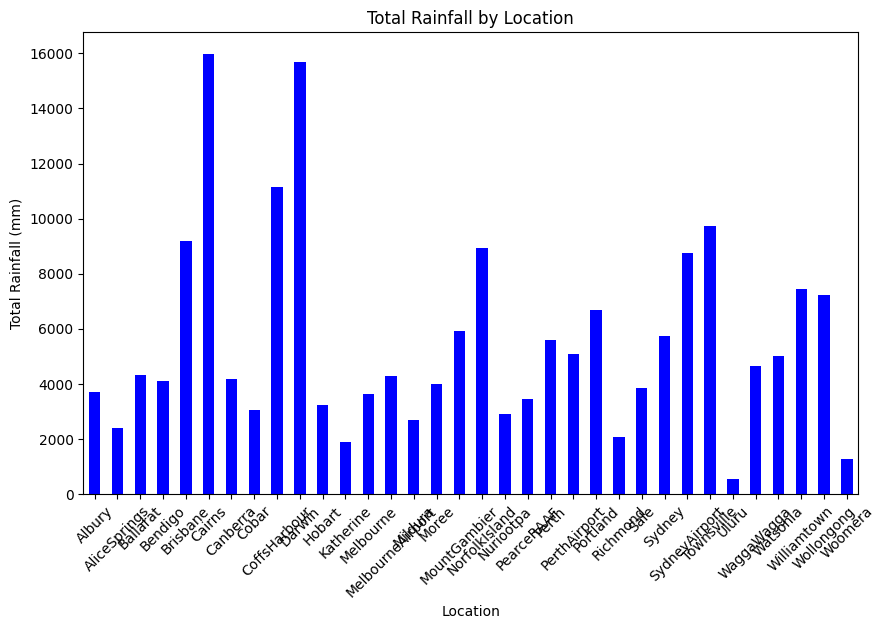

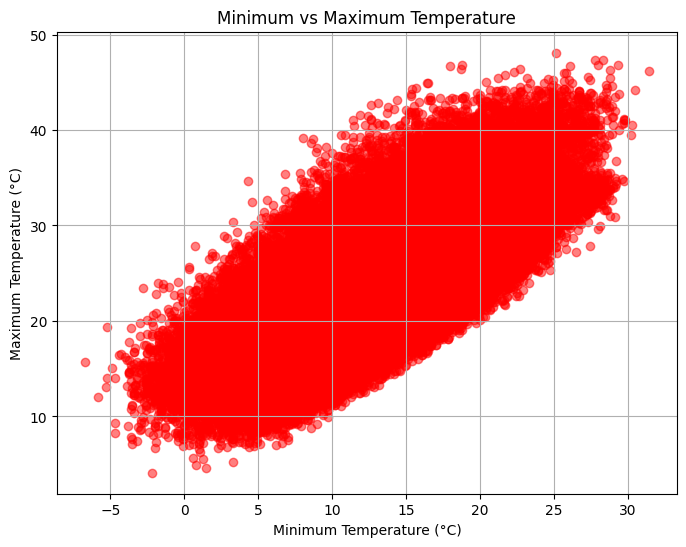

<Figure size 1000x600 with 0 Axes>

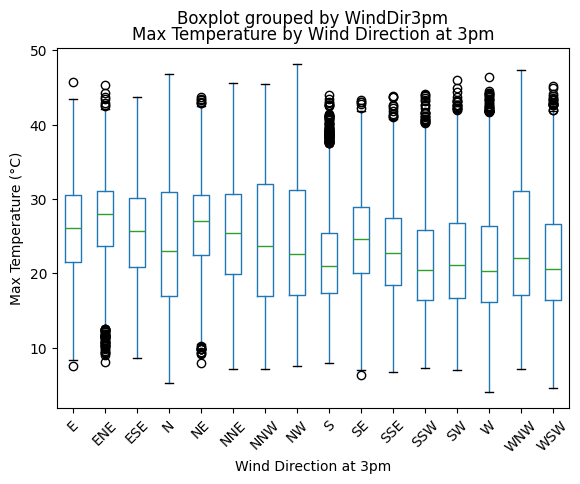

In [10]:
# Gráfico de barras de la cantidad de lluvia por ubicación
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Location')['Rainfall'].sum().plot(kind='bar', color='blue')
plt.title('Total Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de dispersión de la temperatura mínima vs. la temperatura máxima
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['MinTemp'], df_cleaned['MaxTemp'], color='red', alpha=0.5)
plt.title('Minimum vs Maximum Temperature')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(True)
plt.show()

# Gráfico de caja y bigote de la temperatura máxima por dirección del viento en la tarde
plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column='MaxTemp', by='WindDir3pm', grid=False)
plt.title('Max Temperature by Wind Direction at 3pm')
plt.xlabel('Wind Direction at 3pm')
plt.ylabel('Max Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_10917/50069672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df['Date'])


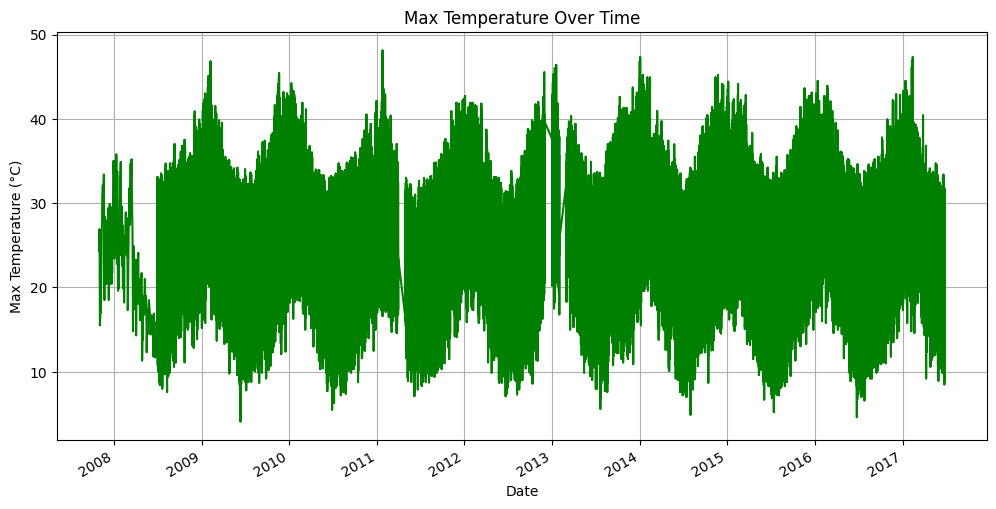

/tmp/ipykernel_10917/50069672.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned.index.month


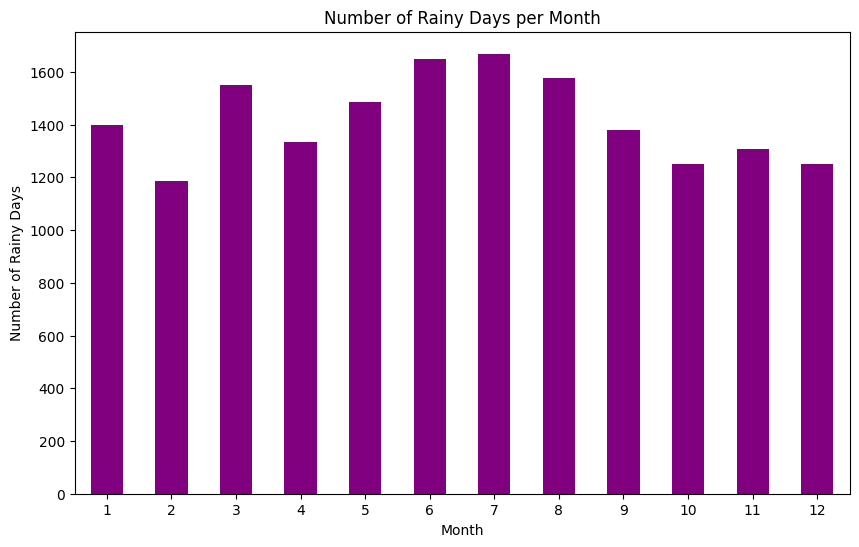

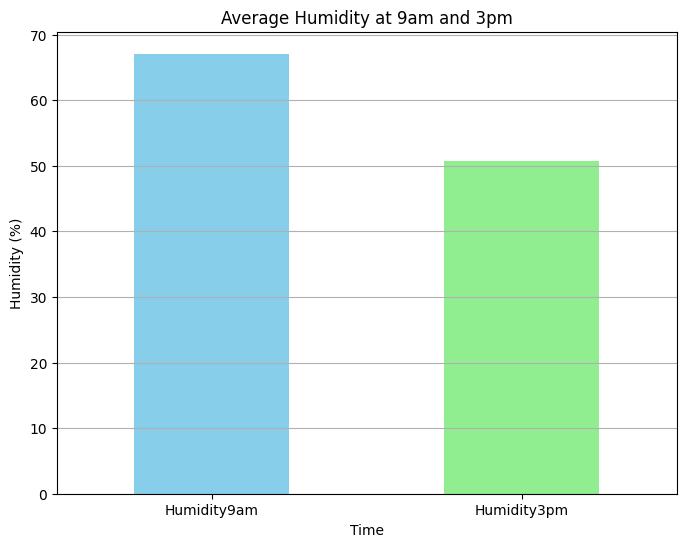

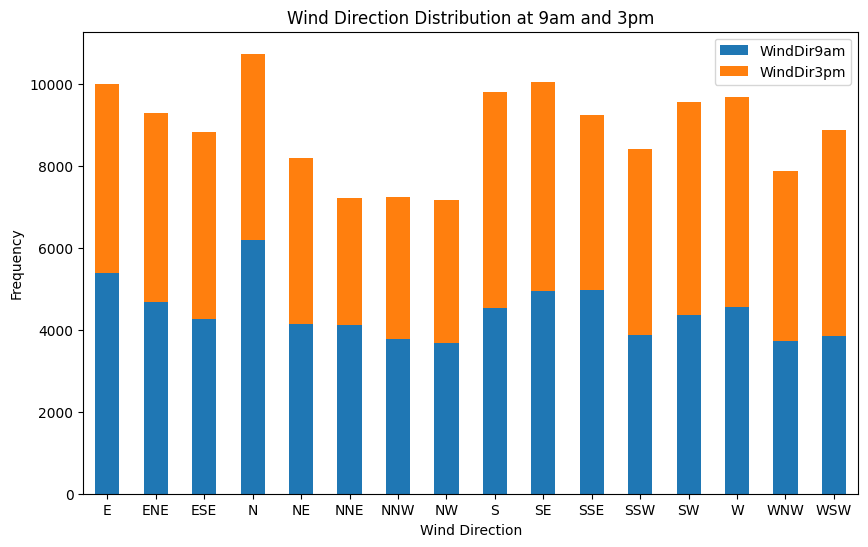

In [11]:
# Gráfico de líneas de la evolución de la temperatura máxima a lo largo del tiempo
plt.figure(figsize=(12, 6))
df_cleaned['Date'] = pd.to_datetime(df['Date'])
df_cleaned.set_index('Date', inplace=True)
df_cleaned['MaxTemp'].plot(color='green')
plt.title('Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.show()

# Gráfico de barras de la cantidad de días lluviosos en cada mes
df_cleaned['Month'] = df_cleaned.index.month
rainy_days = df_cleaned[df_cleaned['RainToday'] == 'Yes']
rainy_days_per_month = rainy_days.groupby('Month').size()
plt.figure(figsize=(10, 6))
rainy_days_per_month.plot(kind='bar', color='purple')
plt.title('Number of Rainy Days per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rainy Days')
plt.xticks(rotation=0)
plt.show()

# Gráfico de barras de la humedad a las 9am y 3pm
humidities = df_cleaned[['Humidity9am', 'Humidity3pm']].mean()

plt.figure(figsize=(8, 6))
humidities.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Humidity at 9am and 3pm')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Gráfico de barras apiladas de la dirección del viento a las 9am y 3pm
wind_directions = df_cleaned[['WindDir9am', 'WindDir3pm']]
wind_directions_stacked = wind_directions.apply(pd.Series.value_counts)
wind_directions_stacked.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Wind Direction Distribution at 9am and 3pm')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


# Regresion Logistica

In [13]:
df_cleaned.corr()

/tmp/ipykernel_10917/1367570080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.corr()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
MinTemp,1.000000,0.759497,0.111750,0.125881,0.104209,0.112057,-0.212334,0.016589,-0.457548,-0.481595,0.072015,0.017780,0.908011,0.737424,-0.201406
MaxTemp,0.759497,1.000000,-0.056618,0.037219,-0.022643,-0.009248,-0.527703,-0.485077,-0.331767,-0.433535,-0.296506,-0.285409,0.900030,0.985498,-0.164344
Rainfall,0.111750,-0.056618,1.000000,0.122317,0.070327,0.057241,0.247186,0.265037,-0.174792,-0.138160,0.205220,0.176989,0.021329,-0.060083,-0.043695
WindGustSpeed,0.125881,0.037219,0.122317,1.000000,0.605874,0.684550,-0.168028,-0.021585,-0.433608,-0.385971,0.086993,0.121681,0.089258,0.000587,0.048017
WindSpeed9am,0.104209,-0.022643,0.070327,0.605874,1.000000,0.504387,-0.207219,-0.030955,-0.201101,-0.150672,0.039272,0.061380,0.044588,-0.034036,0.050521
WindSpeed3pm,0.112057,-0.009248,0.057241,0.684550,0.504387,1.000000,-0.076460,0.042798,-0.288937,-0.243780,0.072237,0.041947,0.087066,-0.031762,0.057014
Humidity9am,-0.212334,-0.527703,0.247186,-0.168028,-0.207219,-0.076460,1.000000,0.705137,0.096024,0.157924,0.465766,0.374257,-0.455347,-0.520386,-0.085244
Humidity3pm,0.016589,-0.485077,0.265037,-0.021585,-0.030955,0.042798,0.705137,1.000000,-0.061491,0.024017,0.530585,0.533923,-0.204311,-0.531156,-0.024923
Pressure9am,-0.457548,-0.331767,-0.174792,-0.433608,-0.201101,-0.288937,0.096024,-0.061491,1.000000,0.961053,-0.143731,-0.156543,-0.418778,-0.291892,0.054239
Pressure3pm,-0.481595,-0.433535,-0.138160,-0.385971,-0.150672,-0.243780,0.157924,0.024017,0.961053,1.000000,-0.073294,-0.092761,-0.479774,-0.402999,0.044539


In [17]:
df_cleaned.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12
2008-12-12,Albury,15.9,21.7,2.2,NNE,31.0,NE,ENE,15.0,13.0,...,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,12
2008-12-13,Albury,15.9,18.6,15.6,W,61.0,NNW,NNW,28.0,28.0,...,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes,12
2008-12-17,Albury,14.1,20.9,0.0,ENE,22.0,SSW,E,11.0,9.0,...,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes,12
2008-12-18,Albury,13.5,22.9,16.8,W,63.0,N,WNW,6.0,20.0,...,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,Yes,Yes,12


In [19]:
#Dividimos en input/output

X = df_cleaned.drop('RainTomorrow', axis=1)
Y = df_cleaned["RainTomorrow"]

X


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
Date,,,,,,,,,,,,,,,,,,,,
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,12
2008-12-12,Albury,15.9,21.7,2.2,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,12
2008-12-13,Albury,15.9,18.6,15.6,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,12
2008-12-17,Albury,14.1,20.9,0.0,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,12
2008-12-18,Albury,13.5,22.9,16.8,W,63.0,N,WNW,6.0,20.0,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,Yes,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-25,Uluru,15.6,27.3,0.0,SSE,41.0,SE,SSE,13.0,15.0,77.0,45.0,1018.0,1014.9,8.0,4.0,19.3,26.4,No,4
2017-05-25,Uluru,14.6,26.3,0.0,S,37.0,SSW,S,19.0,20.0,61.0,36.0,1022.0,1018.6,7.0,1.0,15.4,25.0,No,5
2017-05-29,Uluru,12.7,22.2,0.0,E,37.0,E,ESE,19.0,13.0,59.0,34.0,1024.3,1021.7,8.0,8.0,13.9,21.0,No,5


In [27]:
# Aplicar codificación one-hot a las columnas no numéricas en X
X_encoded = pd.get_dummies(X)


In [43]:
# Vamos a Escalar la data para pasarla al modelo
from sklearn.preprocessing import StandardScaler #Se usa para estandarizar datos

#StandardScaler escala cada caracteristica de tal manera que tenga una media de 0 y una desviación estandar de 1
#Cada caracteristica tendra una distribución normal estandar.
# Escalar los datos codificados
scaler = StandardScaler()

#La estandarizacion nos sirve porque muchos modelos asumen que las caracteristicas estan centradas alrededor de 0.
#Si las caracteristicas tienen distintos rnagos , podria ser muy snesible para el algoritmo.


#Estandirazar los datos de X y los almacenare en una variable que se llame d_scaled. 
#Ajustar y transformar los datos de una vez
d_scaled = scaler.fit_transform(X_encoded)

# Crear un DataFrame a partir de los datos escalados
data_scaled1 = pd.DataFrame(d_scaled, columns=X_encoded.columns)
data_scaled1.head()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.667603,1.181033,-0.174099,-0.004212,-1.055772,0.027473,0.783882,-0.843816,-0.916559,-1.271172,...,-0.282971,-0.278683,-0.253568,-0.260877,-0.280438,-0.2788,-0.248563,-0.275325,0.561566,-0.561566
1,0.419425,-0.299292,-0.047722,-0.752076,-0.092871,-0.792119,1.151710,1.927429,-0.959565,-1.530862,...,-0.282971,-0.278683,-0.253568,-0.260877,-0.280438,-0.2788,-0.248563,-0.275325,-1.780736,1.780736
2,0.419425,-0.732217,1.363486,1.491517,1.471843,0.964148,0.468601,2.022989,-3.281877,-3.146710,...,-0.282971,-0.278683,-0.253568,-0.260877,-0.280438,-0.2788,-0.248563,-0.275325,-1.780736,1.780736
3,0.140224,-0.411015,-0.279413,-1.425154,-0.574322,-1.260456,0.100773,1.497408,-0.715866,-0.636375,...,-0.282971,-0.278683,-0.253568,-0.260877,-0.280438,-0.2788,-0.248563,-0.275325,0.561566,-0.561566
4,0.047157,-0.131708,1.489863,1.641090,-1.176135,0.027473,0.678788,0.685147,-1.633322,-1.819407,...,-0.282971,-0.278683,-0.253568,-0.260877,-0.280438,-0.2788,4.023125,-0.275325,-1.780736,1.780736


In [44]:
from sklearn.model_selection import train_test_split

#Divide los datos en conjunto de entrenamiento y Prueba

#d_scaled Es el DF con las caracteristicas ya normalizadas

#test_size - Le indicamos que queremos un 20% de los datos para testear

#Random_state - Nos garantiza que los mismo conjuntos de entrenamiento y testeo se generan en cada corrida

X_train, X_test, y_train, y_test = train_test_split(d_scaled, Y, test_size = 0.20, random_state = 42)

In [45]:
from sklearn.linear_model import LogisticRegression

# C- controla la regularizacion del modelo, 
# Sirve para prevenir el sobreajuste del modelo al agregar una penalización a la magnitud de los coeficientes.

#Valores pequeños de C → mayor regularización.
#Valores grandes de C → menor regularización.

model = LogisticRegression(C = 0.1, max_iter = 500)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [46]:
X_test

array([[ 0.46595829,  1.22292923, -0.27941337, ..., -0.2753247 ,
         0.56156553, -0.56156553],
       [-1.05413378, -1.80754776, -0.25835055, ..., -0.2753247 ,
         0.56156553, -0.56156553],
       [ 0.63658087,  1.1670679 , -0.27941337, ..., -0.2753247 ,
         0.56156553, -0.56156553],
       ...,
       [-0.46471033, -0.22946527, -0.27941337, ..., -0.2753247 ,
         0.56156553, -0.56156553],
       [-0.6353329 , -1.17910783, -0.13197367, ..., -0.2753247 ,
        -1.78073607,  1.78073607],
       [-0.94555578, -1.06738518, -0.23728774, ..., -0.2753247 ,
         0.56156553, -0.56156553]])

In [47]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [48]:
predicted_proba = model.predict_proba(X_test)

positive_proba = predicted_proba[:, 1]
positive_proba

array([0.02044172, 0.36506579, 0.156865  , ..., 0.07689315, 0.80201651,
       0.13342968])

In [49]:
print('Weight Coefficient : ', model.coef_)
print('Bias : ', model.intercept_)
      

Weight Coefficient :  [[ 9.65696982e-02 -1.77269988e-01  5.44886747e-02  7.96520148e-01
  -9.54188103e-02 -2.21795005e-01  4.76877360e-02  1.29122811e+00
   1.09868625e+00 -1.50130316e+00  1.45298899e-01  4.89512686e-01
   1.03190625e-01 -2.71802706e-02  2.85319149e-02  2.92560234e-02
  -2.90242564e-02 -1.07371350e-01  1.23504347e-02  9.64429670e-02
   3.04978379e-02 -5.43558545e-03  6.45547658e-02  3.17504690e-02
  -1.01338467e-01 -8.98529545e-02 -7.85036343e-02 -1.66462637e-02
  -5.98162904e-02  1.60339581e-02  5.05433617e-03  1.52945483e-02
  -6.61021675e-02  5.01758047e-03  6.36559244e-02  1.20603743e-01
   9.32565124e-02 -1.40622894e-03  1.66704188e-02 -5.97984459e-02
   2.37250609e-02  7.39132507e-03 -1.08746823e-01  3.48554389e-02
   5.60483881e-02 -2.25624209e-02  3.49264165e-02 -1.85694086e-02
  -1.84415124e-03 -1.60727777e-02 -3.91761414e-02  2.48869982e-02
  -4.94289369e-02 -5.37526176e-02 -4.38158259e-02  1.18401172e-03
  -1.77056466e-02  3.20637665e-02  3.38031691e-02  4.4

# Resultado de la prediccion

In [50]:
print('Test accuracy: ', model.score(X_test, y_test))
print('Train accuracy: ', model.score(X_train, y_train))

Test accuracy:  0.8512914350059821
Train accuracy:  0.8497255260750228


# Matriz de Confusion

In [51]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear DataFrame para la matriz de confusión con etiquetas relacionadas con RainTomorrow
df_confusion = pd.DataFrame(cm, columns=['Lluvia Predicha', 'Sin Lluvia Predicha'],
                            index=['Lluvia Real', 'Sin Lluvia Real'])

df_confusion


,Lluvia Predicha,Sin Lluvia Predicha
Lluvia Real,10186,630
Sin Lluvia Real,1483,1910


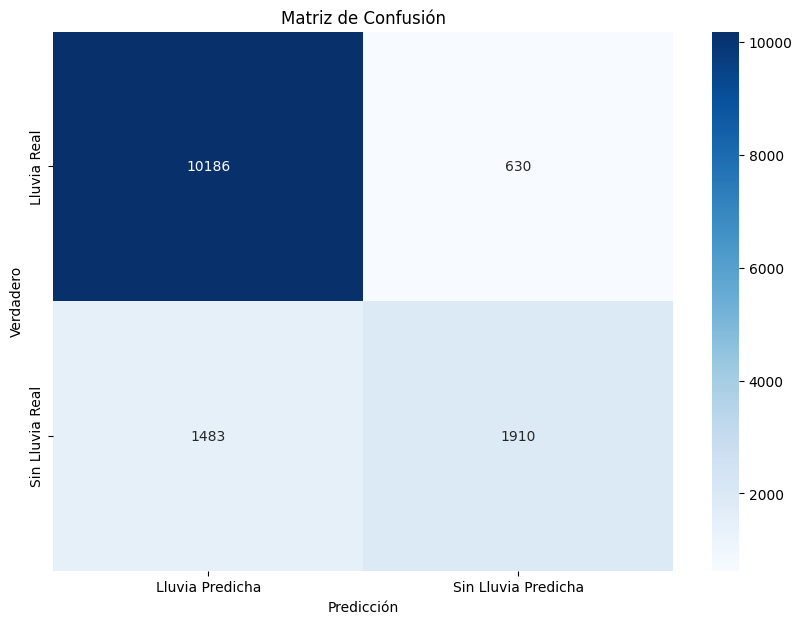

In [52]:
# Crear la figura y el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_confusion, annot=True, fmt="d", cmap="Blues")

# Añadir título y etiquetas
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')

# Mostrar el heatmap
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score

print("Accuracy : ", accuracy_score(y_test, y_pred) )


Accuracy :  0.8512914350059821


In [55]:
# Suponiendo que has definido tu modelo como 'modelo'
model.feature_names_in_ = data_scaled1.columns.tolist()


final_prov = model.predict_proba(data_scaled1)

final_positiv_proba = final_prov[:,1]
final_positiv_proba

array([0.34894923, 0.95572811, 0.99192018, ..., 0.09631277, 0.0270842 ,
       0.01436401])

In [56]:
final_tags = model.predict(data_scaled1)
final_tags

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)